### Silhouette Score (-1 <= ss <= 1) 
### - if it's (greater than 1) it could be a good Cluster Finding accuracy 
### - if it's (smaller then 1 or -1)  it could be a bad Cluster Finding accuracy

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
dataset = pd.read_csv(r"C:\Users\My\Downloads\iris.csv")
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# KMeans Clusting Accurecy test

In [47]:
from sklearn.cluster import KMeans

In [48]:
wcss = []

for i in range(2,21): 
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)

In [49]:
kmn = KMeans(n_clusters=3)
kmn.fit_predict(dataset)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### • wcss = 3

In [50]:
from sklearn.metrics import silhouette_score

In [51]:
ss = silhouette_score(dataset,labels=kmn.labels_)
ss

0.5528190123564102

In [52]:
# -1 <= ss✅
# ss < 1 ✅

In [53]:
ss=[]
no_cluster = [j for j in range(2,21)]
for i in range(2,21): 
    km = KMeans(n_clusters=i)
    km.fit(dataset)
    ss.append(silhouette_score(dataset,km.labels_))

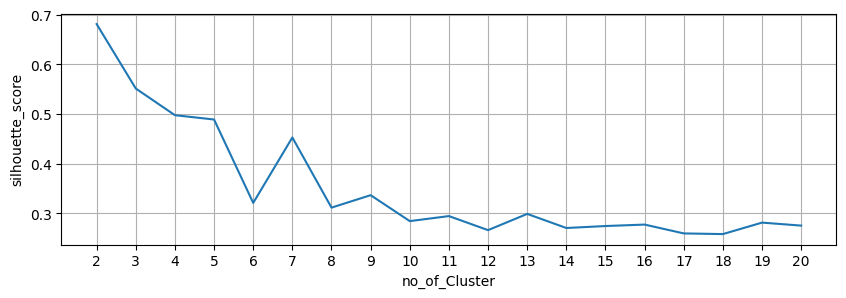

In [54]:
plt.figure(figsize=(10,3))
plt.plot(no_cluster,ss)
plt.xticks(no_cluster)
plt.xlabel("no_of_Cluster")
plt.ylabel("silhouette_score")
plt.grid('x')
plt.show()

In [55]:
# The Graph start from 2 no_of_Cluster So (Cluster = 2)

###        - Result -
###  • K-mean show Cluster = 3  
###  • Silhouette Score show Cluster = 2

# Hierarchical Clustering Accurecy test

In [56]:
from sklearn.cluster import AgglomerativeClustering

In [57]:
ac = AgglomerativeClustering(n_clusters=2,linkage="single")
dataset["Predicted_data"] = ac.fit_predict(dataset)
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,Predicted_data
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### • ac = 2

In [58]:
from sklearn.metrics import silhouette_score

In [59]:
ss = silhouette_score(dataset,labels=kmn.labels_)
ss

0.5576853964035263

In [62]:
ss=[]
no_cluster = [j for j in range(2,21)]
for i in range(2,21): 
    ac = AgglomerativeClustering(n_clusters=i)
    ac.fit(dataset)
    ss.append(silhouette_score(dataset,ac.labels_))

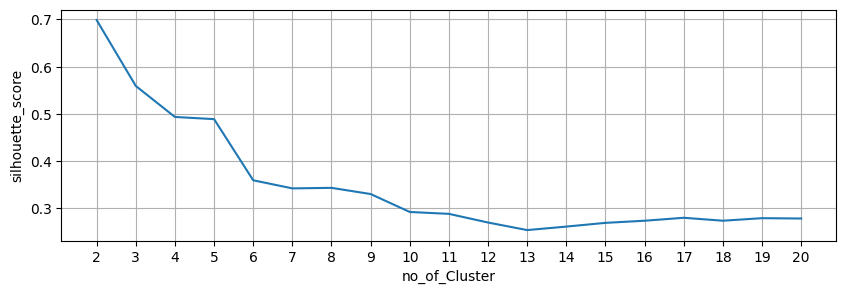

In [63]:
plt.figure(figsize=(10,3))
plt.plot(no_cluster,ss)
plt.xticks(no_cluster)
plt.xlabel("no_of_Cluster")
plt.ylabel("silhouette_score")
plt.grid('x')
plt.show()

###        - Result -
###  • Hierarchical Clustering show Cluster = 2  
###  • Silhouette Score show Cluster = 2